# Analyse game experience data

In [2]:
!pip3 install pandas matplotlib numpy

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [4]:
def load_experience_from_file(path:str):
    if os.path.exists(path):
        return pd.read_csv(path)
    else:
        return pd.DataFrame(columns=['board_state', 'mcts_prob', 'z_value'])

path = 'game_experience.txt'
dataset = load_experience_from_file(path)

In [5]:
dataset.head()

,board_state,mcts_prob,z_value
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0,...",1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0.021739130434782608, 0.0, 0.0, 0.0, 0.0, 0....",-1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0.020833333333333332, 0.0, 0.020833333333333...",1
4,"[[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,...","[[0.0, 0.02127659574468085, 0.0, 0.02127659574...",-1


In [6]:
def plot_heatmap(data, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(data, cmap='hot', interpolation='nearest')
    plt.colorbar()  # Add a colorbar for reference
    plt.title(title)
    plt.show()

# Bias in win loss dataset

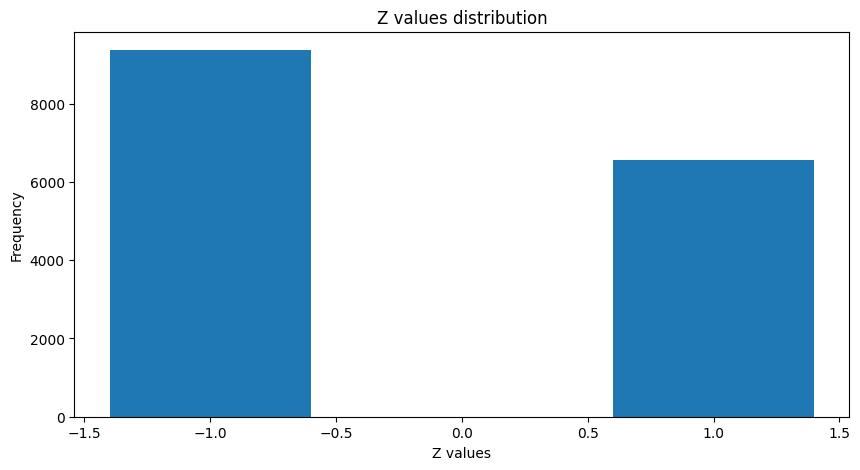

In [7]:
z_values = dataset['z_value']

# Plotting the z_values
plt.figure(figsize=(10, 5))
plt.bar(z_values.value_counts().index, z_values.value_counts().values)
plt.title('Z values distribution')
plt.xlabel('Z values')
plt.ylabel('Frequency')
plt.show()

# Tile Selection Distiburion

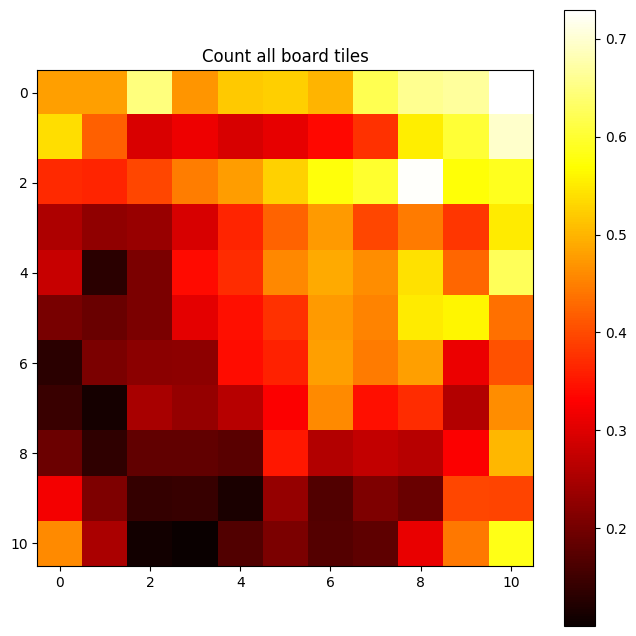

In [43]:
selected_tiles = dataset['board_state'].apply(ast.literal_eval).tolist()

# set all -1 to 1
for record in selected_tiles:
    for i in range(11):
        for j in range(11):
            if record[i][j] == -1:
                record[i][j] = 1

plot_heatmap(np.array(selected_tiles).mean(axis=0), 'Count all board tiles')


# MCTS Probs of all games

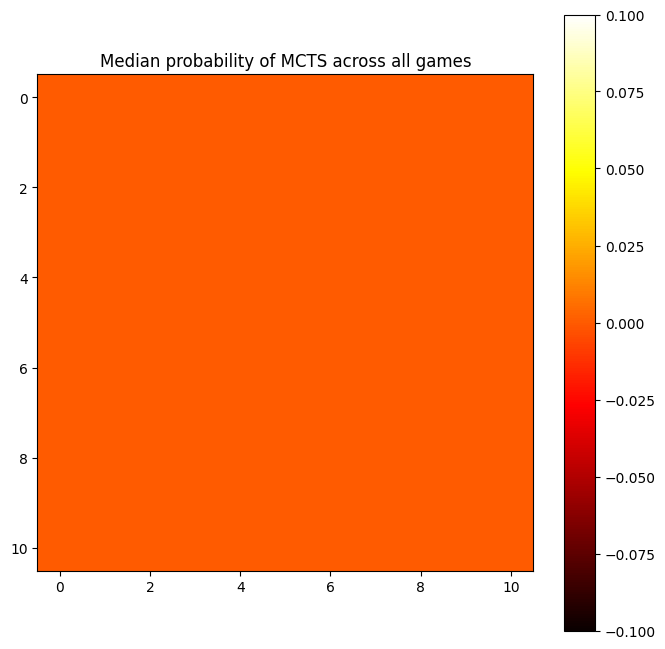

In [42]:
mcts_probs = dataset['mcts_prob'].apply(ast.literal_eval).tolist()

plot_heatmap(np.median(np.array(mcts_probs), axis=0), 'Median probability of MCTS across all games')

# Median MCTS Probs last 2000 games

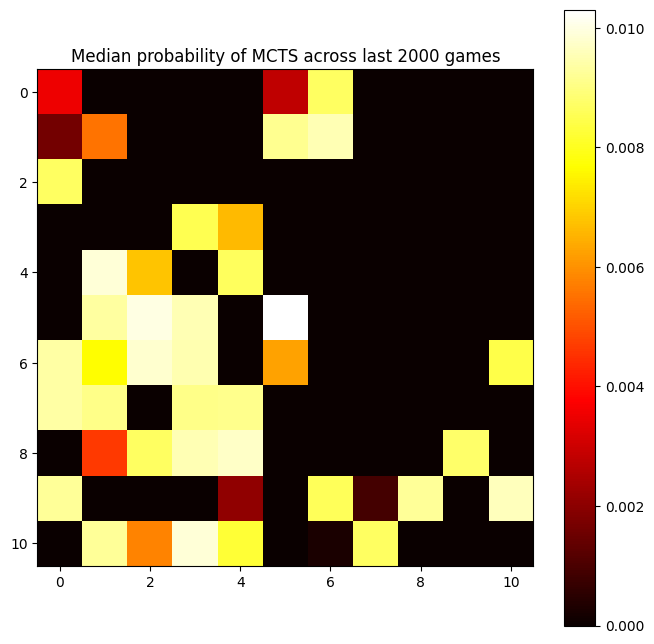

In [40]:
mcts_probs = dataset['mcts_prob'].apply(ast.literal_eval).tolist()

plot_heatmap(np.median(np.array(mcts_probs[-2000:]), axis=0), 'Median probability of MCTS across last 2000 games')

# Mean MCTS Probs last 2000 games

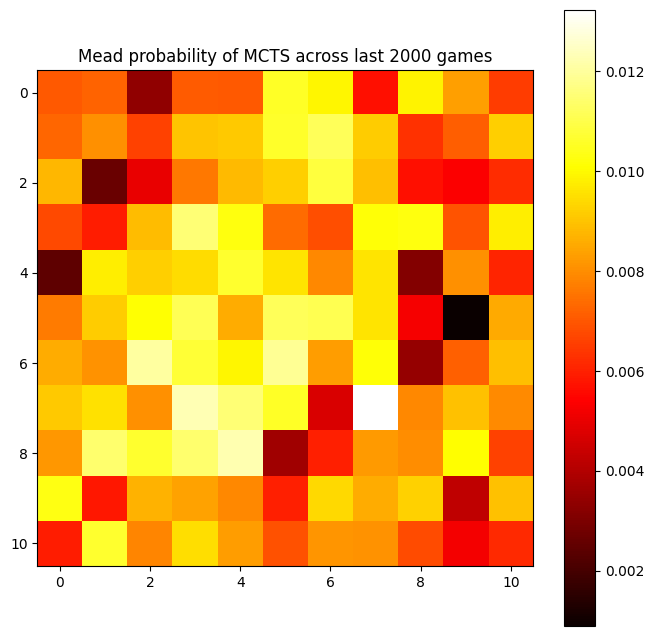

In [46]:
mcts_probs = dataset['mcts_prob'].apply(ast.literal_eval).tolist()

plot_heatmap(np.array(mcts_probs[-2000:]).mean(axis=0), 'Mean probability of MCTS across last 2000 games')